In [1]:
# Import library for load data
import ray
ray.init(num_cpus=8)
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from category_encoders import OrdinalEncoder
from numpy import genfromtxt
import sys
import csv
# Import deeplearning library
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms 
import matplotlib.pyplot as plt
import time
import os
import glob
import copy
import numpy as np 
import sys
sys.path.append('/home/jun/DDoSDeepLearningProject/')
from CustomFunction import *
from model_define import *


2023-07-28 20:48:49,513	INFO worker.py:1636 -- Started a local Ray instance.


In [2]:
print('-------------ANALYZE DATASET-------------')
CICIDS2019 = pd.read_csv('/home/jun/DDoSDeepLearningProject/dataset_ddos/CICIDS2019.csv')
CICIDS2018 = pd.read_csv('/home/jun/DDoSDeepLearningProject/dataset_ddos/CICIDS2018.csv')
CICIDS2017 = pd.read_csv('/home/jun/DDoSDeepLearningProject/dataset_ddos/CICIDS2017.csv')
print("ALL DONE!")
    

-------------ANALYZE DATASET-------------


Data types of partitions are different! Please refer to the troubleshooting section of the Modin documentation to fix this issue.


ALL DONE!


In [3]:
# Get list of avaible labels
CICIDS2019_labels = set(CICIDS2019['Label'])
CICIDS2018_labels = set(CICIDS2018['Label'])
CICIDS2017_labels = set(CICIDS2017['Label'])
print("Labels of CICIDS2019:", CICIDS2019_labels)
print("Labels of CICIDS2018:", CICIDS2018_labels)
print("Labels of CICIDS2017:", CICIDS2017_labels)

Labels of CICIDS2019: {'DrDoS_NetBIOS', 'BENIGN', 'DrDoS_DNS', 'TFTP', 'UDP-lag', 'WebDDoS', 'DrDoS_MSSQL', 'Syn', 'DrDoS_NTP', 'DrDoS_SSDP', 'DrDoS_SNMP', 'DrDoS_UDP', 'DrDoS_LDAP'}
Labels of CICIDS2018: {'DoS Slowhttptest', 'DoS GoldenEye', 'BENIGN', 'DDoS attacks-LOIC-HTTP', 'DDOS attack-HOIC', 'DoS Hulk', 'DDOS attack-LOIC-UDP', 'DoS slowloris'}
Labels of CICIDS2017: {'DoS Slowhttptest', 'DoS GoldenEye', 'BENIGN', 'DDoS', 'DoS Hulk', 'DoS slowloris'}


In [4]:
#Check for NaN and Inf Columnns
print("CICIDS2019 Dataset: Contain NaN values columns:", CICIDS2019.columns[CICIDS2019.isna().any()].tolist())
print("CICIDS2019 Dataset Contain infinity values columns:", CICIDS2019.columns[CICIDS2019.isin([np.inf, -np.inf]).any()].tolist())
print("CICIDS2018 Dataset: Contain NaN values columns:", CICIDS2018.columns[CICIDS2018.isna().any()].tolist())
print("CICIDS2018 Dataset Contain infinity values columns:", CICIDS2018.columns[CICIDS2018.isin([np.inf, -np.inf]).any()].tolist())
print("CICIDS2017 Dataset: Contain NaN values columns:", CICIDS2017.columns[CICIDS2017.isna().any()].tolist())
print("CICIDS2017 Contain infinity values columns:", CICIDS2017.columns[CICIDS2017.isin([np.inf, -np.inf]).any()].tolist())#print("Test Dataset: Contain NaN values columns:", test.columns[test.isna().any()].tolist())
#print("Test Dataset Contain infinity values columns:", test.columns[test.isin([np.inf, -np.inf]).any()].tolist())

CICIDS2019 Dataset: Contain NaN values columns: ['Flow Bytes/s']
CICIDS2019 Dataset Contain infinity values columns: ['Flow Bytes/s', 'Flow Packets/s']
CICIDS2018 Dataset: Contain NaN values columns: ['Flow Bytes/s']
CICIDS2018 Dataset Contain infinity values columns: ['Flow Bytes/s', 'Flow Packets/s']
CICIDS2017 Dataset: Contain NaN values columns: ['Flow Bytes/s']
CICIDS2017 Contain infinity values columns: ['Flow Bytes/s', 'Flow Packets/s']


Number of TFTP flow is: 20082579/50063099 (40.11)
Number of DrDoS_SNMP flow is: 5159869/50063099 (10.31)
Number of DrDoS_DNS flow is: 5071010/50063099 (10.13)
Number of DrDoS_MSSQL flow is: 4522491/50063099 (9.03)
Number of DrDoS_NetBIOS flow is: 4093278/50063099 (8.18)
Number of DrDoS_UDP flow is: 3134644/50063099 (6.26)
Number of DrDoS_SSDP flow is: 2610610/50063099 (5.21)
Number of DrDoS_LDAP flow is: 2179929/50063099 (4.35)
Number of Syn flow is: 1582288/50063099 (3.16)
Number of DrDoS_NTP flow is: 1202641/50063099 (2.40)
Number of UDP-lag flow is: 366460/50063099 (0.73)
Number of BENIGN flow is: 56862/50063099 (0.11)
Number of WebDDoS flow is: 438/50063099 (0.00)


<Figure size 2000x500 with 0 Axes>

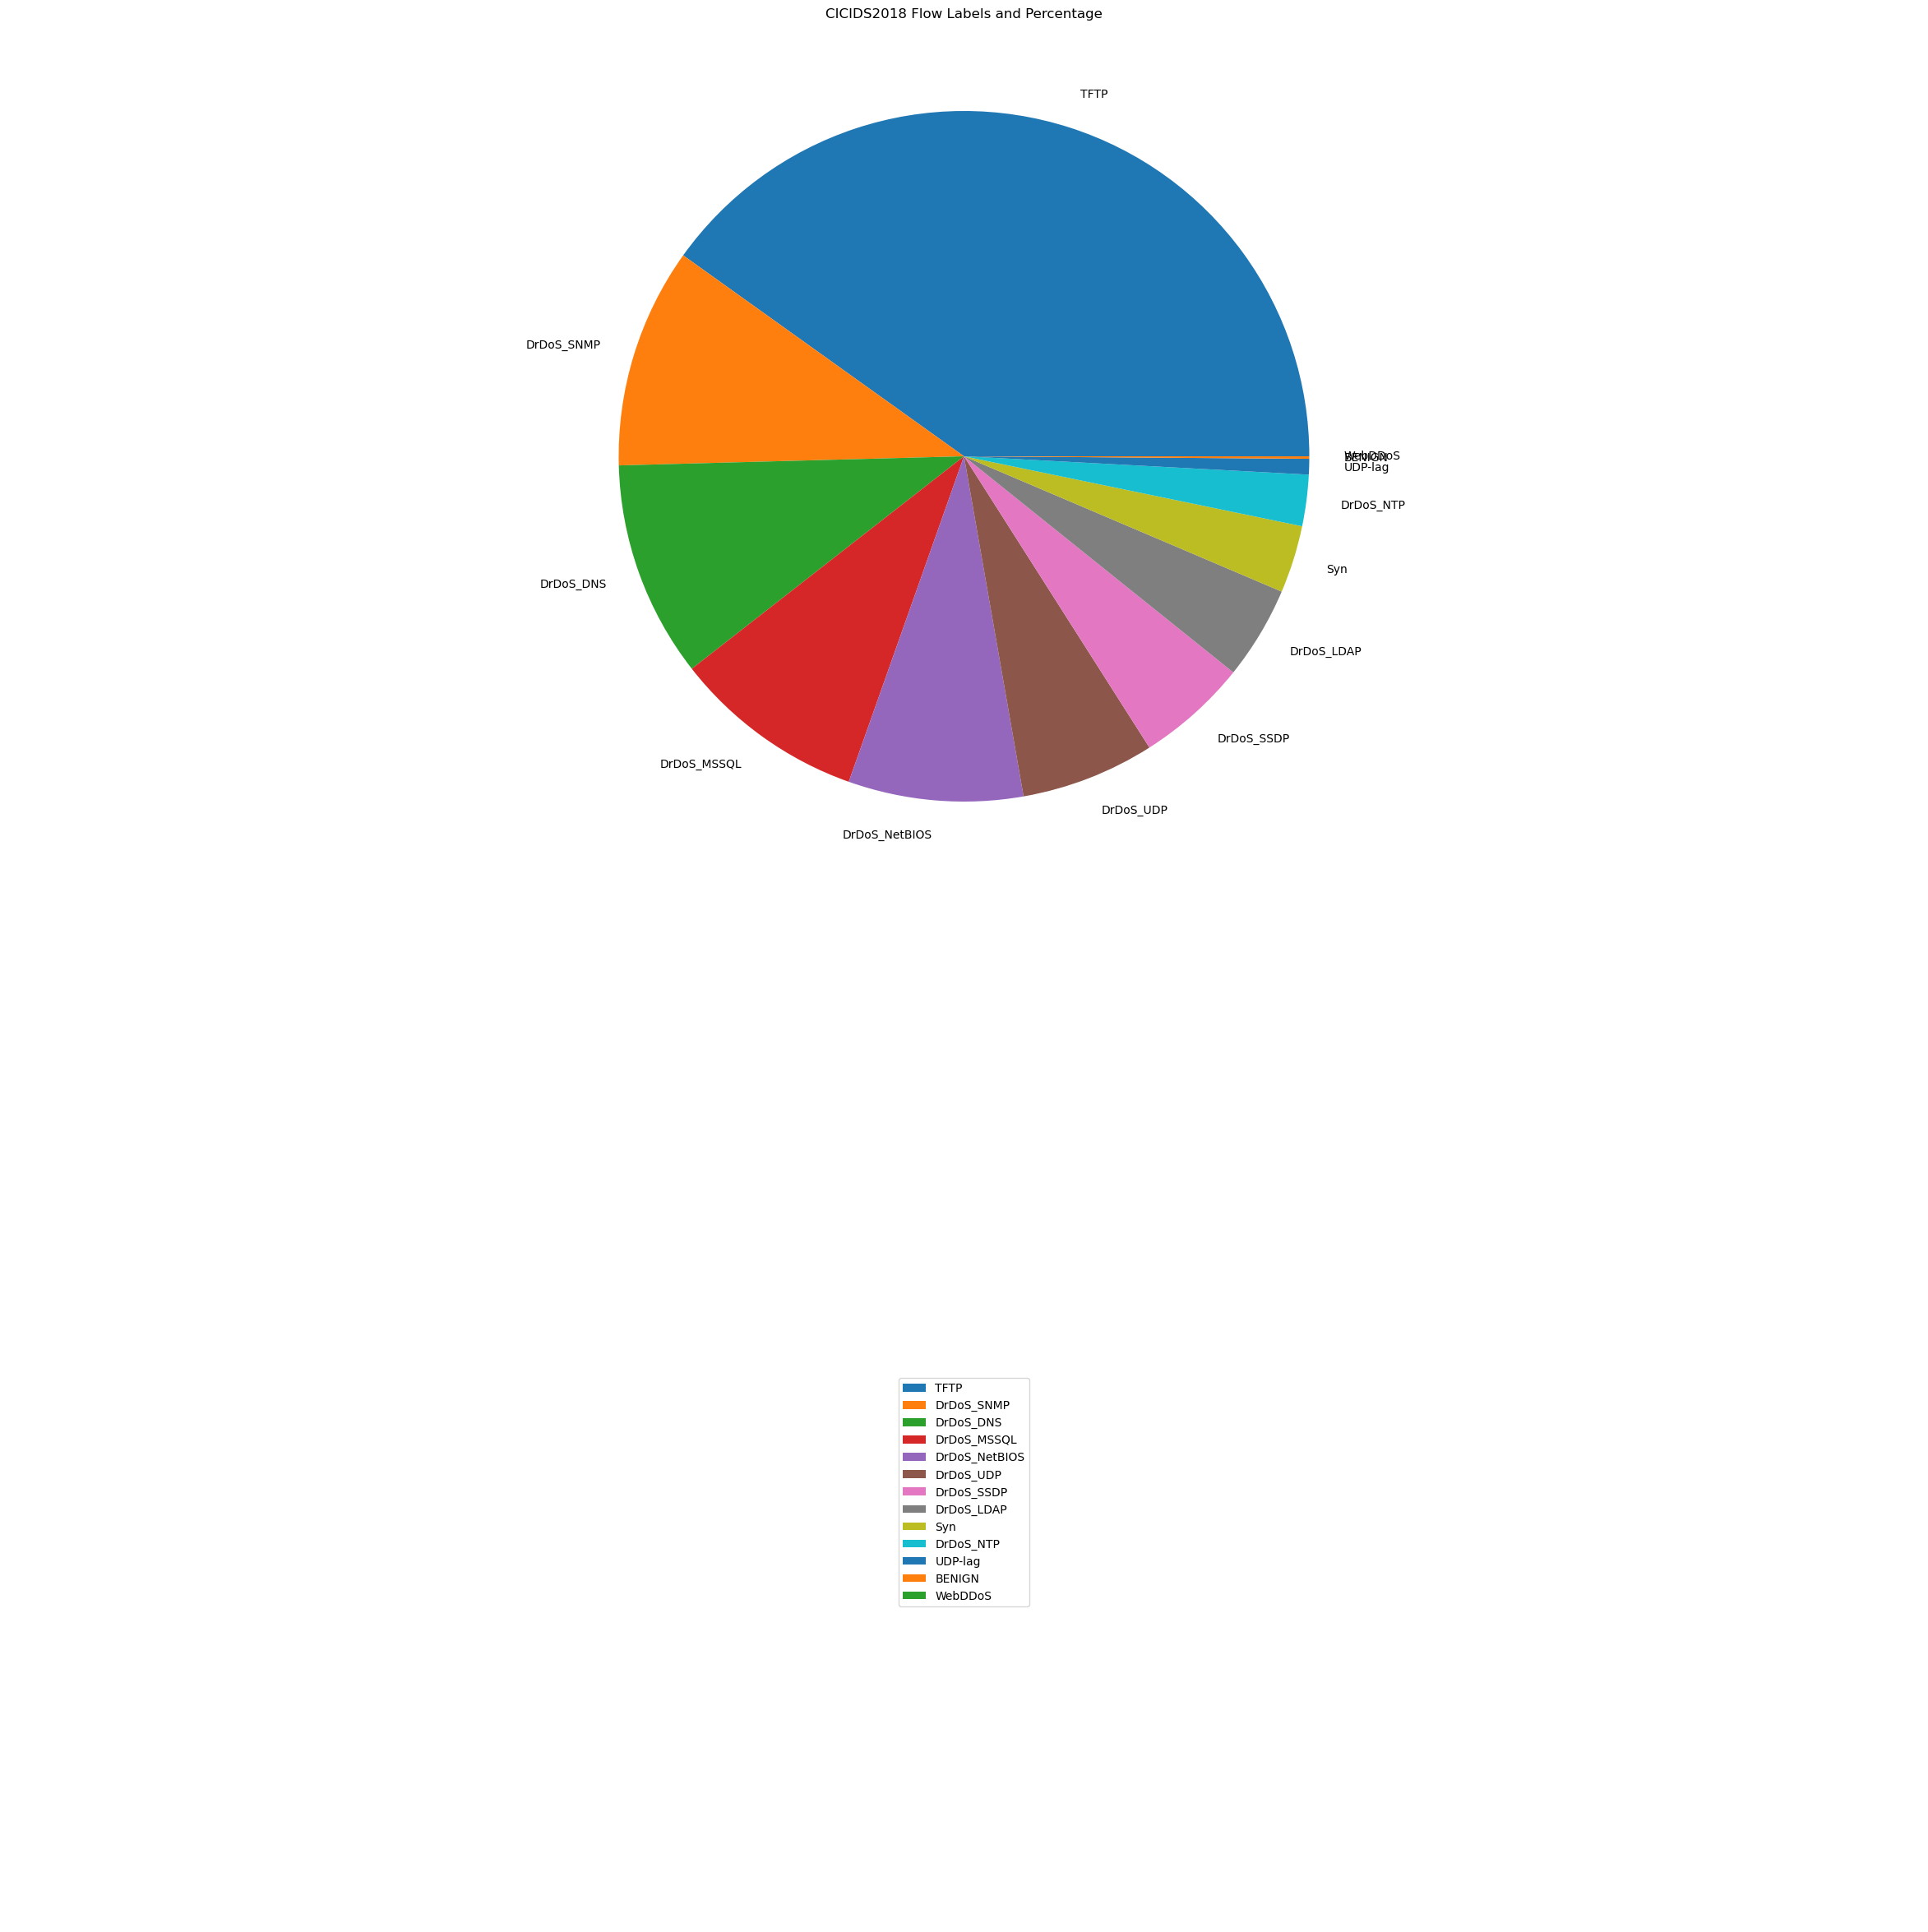

In [5]:
#CICIDS2019 data plot
CICIDS2019_flow_labels = flows_labels_count(CICIDS2019)
for flow_label, flow_number in CICIDS2019_flow_labels.items():
        print('Number of {} flow is: {}/{} ({:.2f})'.format(flow_label, flow_number, sum(CICIDS2019_flow_labels.values()), flow_number/sum(CICIDS2019_flow_labels.values())*100))
#Create Packets Number based on label Figure
CICIDS2019_flow_figure_num = plt.figure(figsize = (20, 5))
fig = plt.figure(20, figsize=(30,30))
ax = fig.add_subplot(211)
ax.set_title("CICIDS2018 Flow Labels and Percentage")
pie = ax.pie(CICIDS2019_flow_labels.values(),labels = CICIDS2019_flow_labels.keys())
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0], CICIDS2019_flow_labels.keys(), loc = 'center')

Number of BENIGN flow is: 13484707/15402933 (87.55)
Number of DDOS attack-HOIC flow is: 686011/15402933 (4.45)
Number of DDoS attacks-LOIC-HTTP flow is: 576190/15402933 (3.74)
Number of DoS Hulk flow is: 461911/15402933 (3.00)
Number of DoS Slowhttptest flow is: 139889/15402933 (0.91)
Number of DoS GoldenEye flow is: 41507/15402933 (0.27)
Number of DoS slowloris flow is: 10989/15402933 (0.07)
Number of DDOS attack-LOIC-UDP flow is: 1729/15402933 (0.01)


<Figure size 2000x500 with 0 Axes>

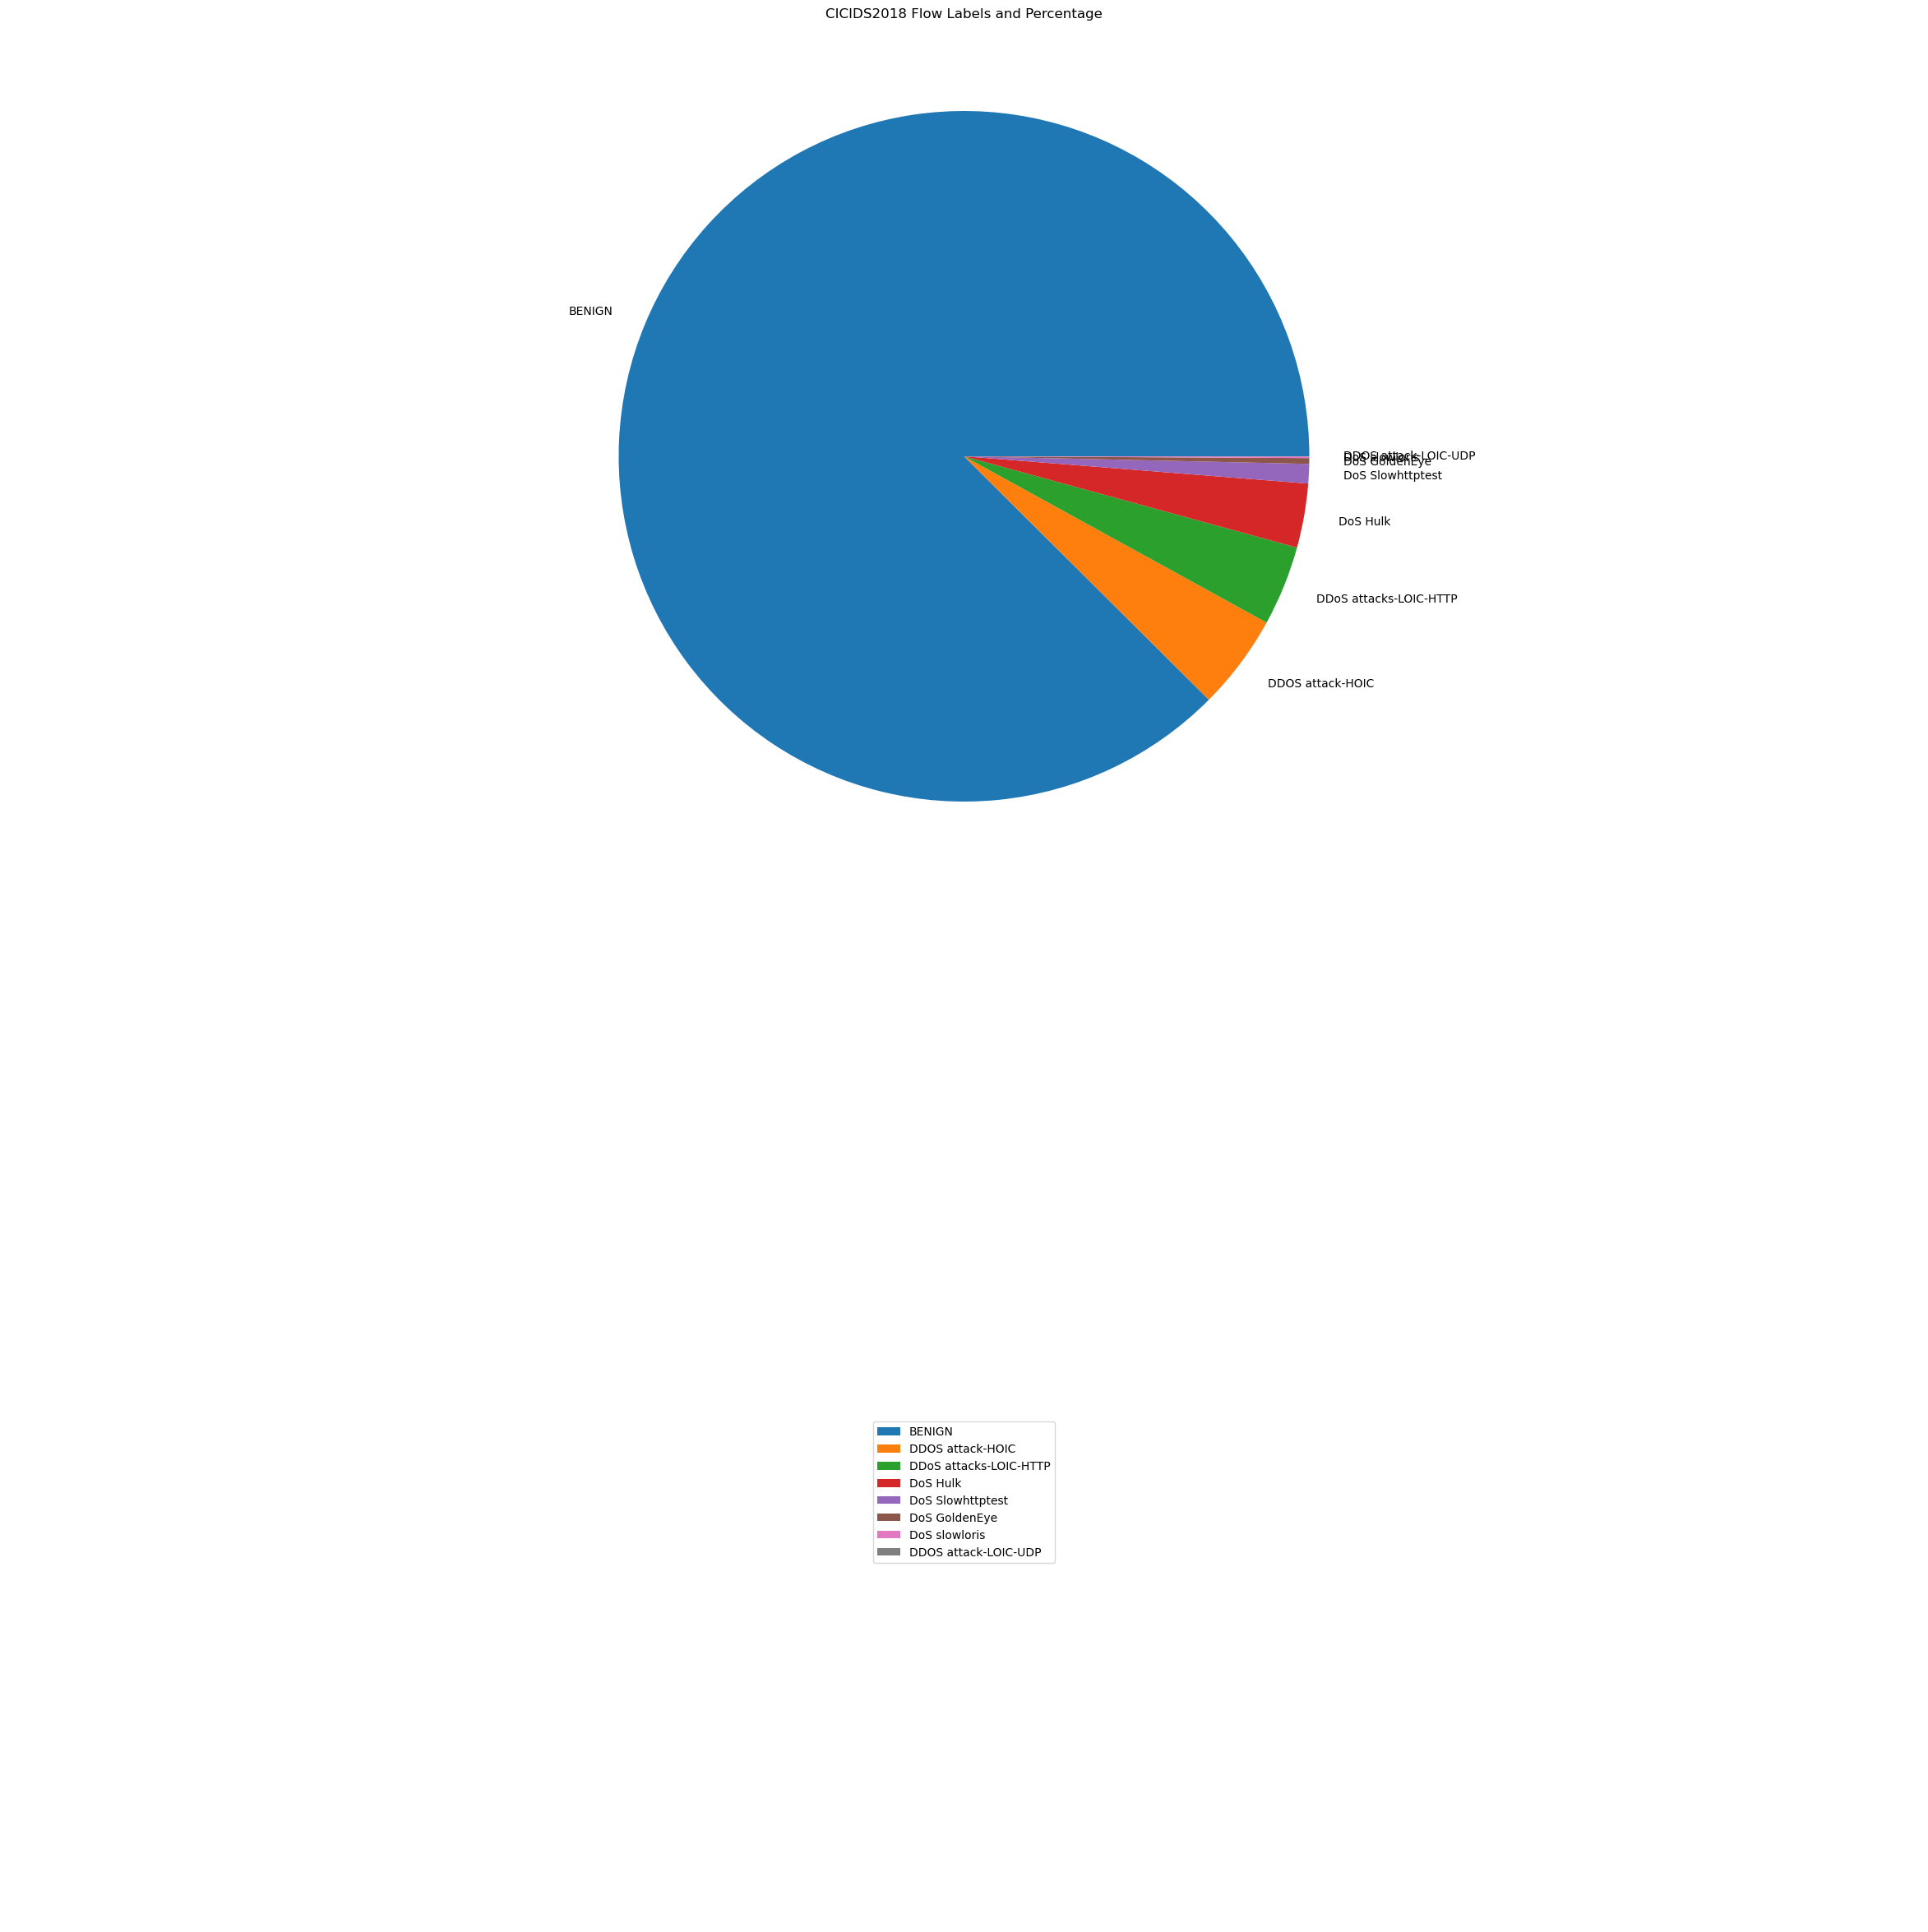

In [6]:
#CICIDS2018 data plot
CICIDS2018_flow_labels = flows_labels_count(CICIDS2018)
for flow_label, flow_number in CICIDS2018_flow_labels.items():
        print('Number of {} flow is: {}/{} ({:.2f})'.format(flow_label, flow_number, sum(CICIDS2018_flow_labels.values()), flow_number/sum(CICIDS2018_flow_labels.values())*100))
#Create Packets Number based on label Figure
CICIDS2018_flow_figure_num = plt.figure(figsize = (20, 5))
# creating the pie chart plot
fig = plt.figure(20, figsize=(30,30))
ax = fig.add_subplot(211)
ax.set_title("CICIDS2018 Flow Labels and Percentage")
pie = ax.pie(CICIDS2018_flow_labels.values(),labels = CICIDS2018_flow_labels.keys())
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0], CICIDS2018_flow_labels.keys(), loc = 'center')

plt.show()

Number of BENIGN flow is: 2104910/2485593 (84.68)
Number of DoS Hulk flow is: 231072/2485593 (9.30)
Number of DDoS flow is: 128026/2485593 (5.15)
Number of DoS GoldenEye flow is: 10292/2485593 (0.41)
Number of DoS slowloris flow is: 5795/2485593 (0.23)
Number of DoS Slowhttptest flow is: 5498/2485593 (0.22)


<Figure size 2000x500 with 0 Axes>

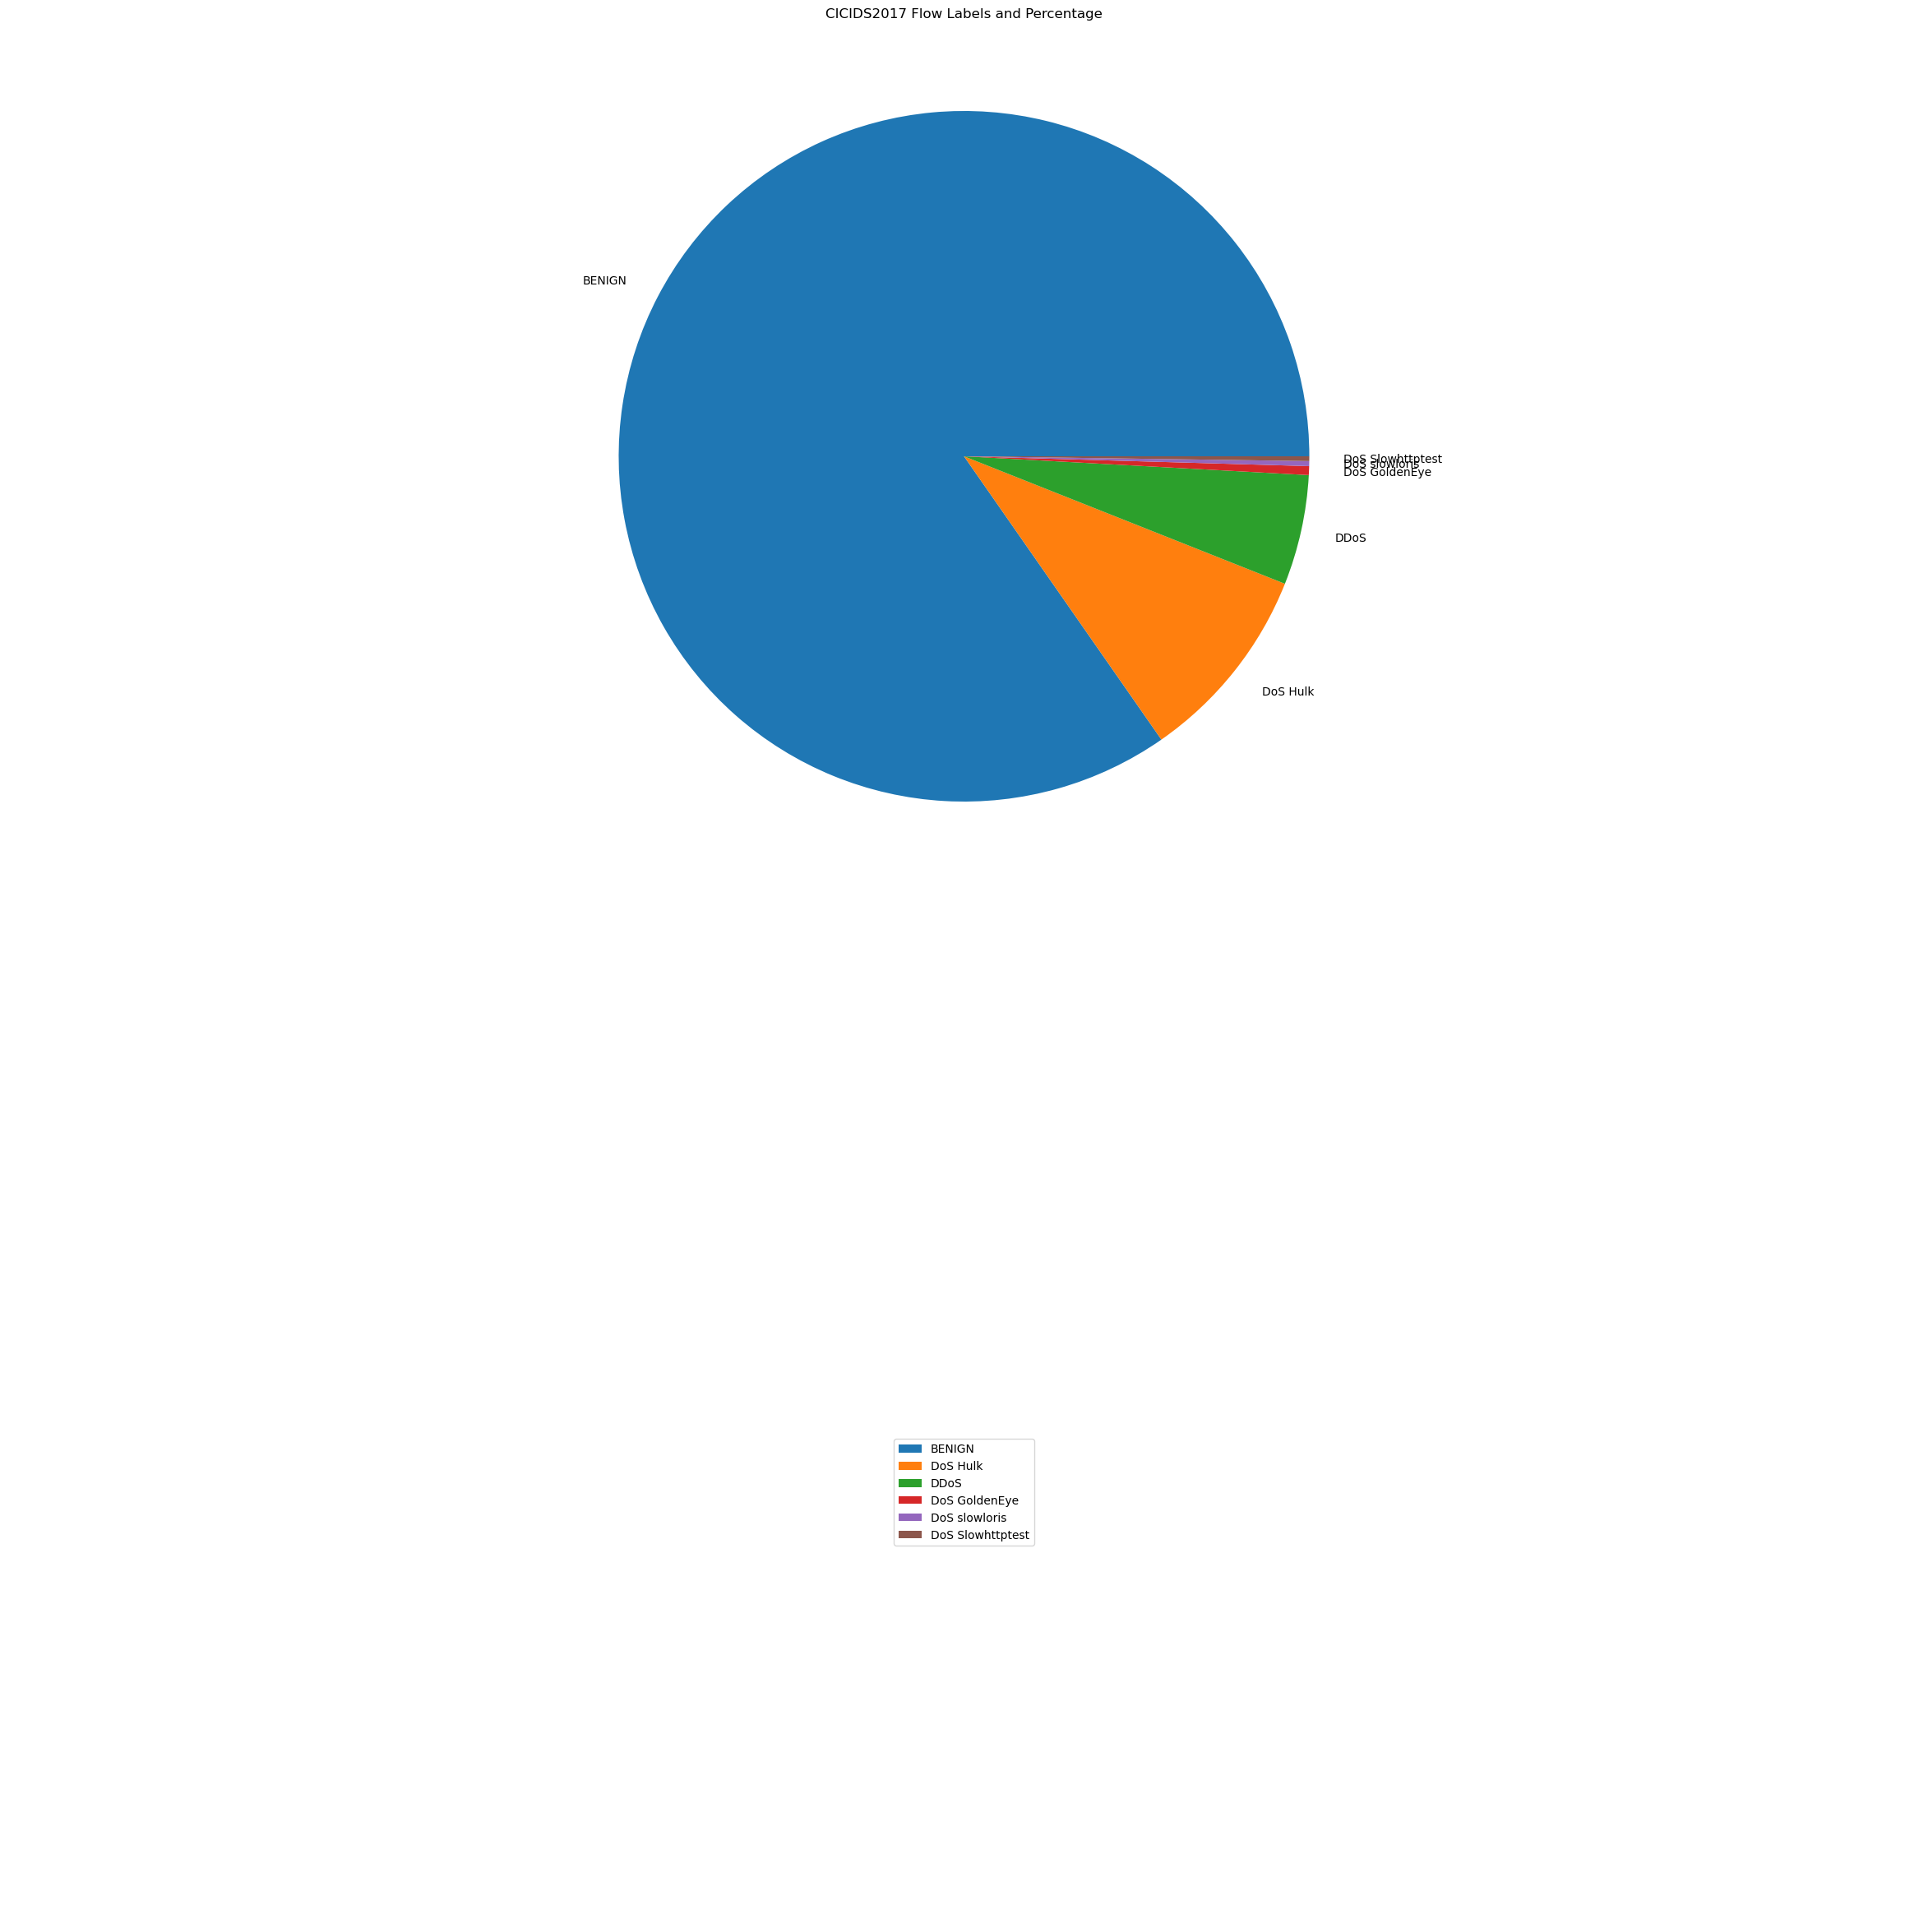

In [7]:
#CICIDS2017 data plot
CICIDS2017_flow_labels = flows_labels_count(CICIDS2017)
for flow_label, flow_number in CICIDS2017_flow_labels.items():
        print('Number of {} flow is: {}/{} ({:.2f})'.format(flow_label, flow_number, sum(CICIDS2017_flow_labels.values()), flow_number/sum(CICIDS2017_flow_labels.values())*100))
#Create Packets Number based on label Figure
CICIDS2017_flow_figure_num = plt.figure(figsize = (20, 5))
# creating the bar plot
fig = plt.figure(20, figsize=(30,30))
ax = fig.add_subplot(211)
ax.set_title("CICIDS2017 Flow Labels and Percentage")
pie = ax.pie(CICIDS2017_flow_labels.values(),labels = CICIDS2017_flow_labels.keys())
ax2 = fig.add_subplot(212)
ax2.axis("off") 
ax2.legend(pie[0], CICIDS2017_flow_labels.keys(), loc = 'center')

In [8]:
CICIDS2019 = drop_NaN(CICIDS2019)
CICIDS2019_dropped_labels = flows_labels_count(CICIDS2019)
CICIDS2018 = drop_NaN(CICIDS2018)
CICIDS2018_dropped_labels = flows_labels_count(CICIDS2018)
CICIDS2017 = drop_NaN(CICIDS2017)
CICIDS2017_dropped_labels = flows_labels_count(CICIDS2017)

In [9]:
# CICIDS2019 dropped number of flows
for flow_label, flow_number in CICIDS2019_dropped_labels.items():
    print('({}) Dropped CICIDS2019 flow number is: {} ({:.2f}%)'.format(flow_label, -flow_number + CICIDS2019_flow_labels[flow_label], (-flow_number + CICIDS2019_flow_labels[flow_label])/flow_number*100))

(TFTP) Dropped CICIDS2019 flow number is: 566609 (2.90%)
(DrDoS_SNMP) Dropped CICIDS2019 flow number is: 10609 (0.21%)
(DrDoS_DNS) Dropped CICIDS2019 flow number is: 162346 (3.31%)
(DrDoS_MSSQL) Dropped CICIDS2019 flow number is: 126446 (2.88%)
(DrDoS_NetBIOS) Dropped CICIDS2019 flow number is: 129833 (3.28%)
(DrDoS_UDP) Dropped CICIDS2019 flow number is: 40643 (1.31%)
(DrDoS_SSDP) Dropped CICIDS2019 flow number is: 42042 (1.64%)
(DrDoS_LDAP) Dropped CICIDS2019 flow number is: 38630 (1.80%)
(Syn) Dropped CICIDS2019 flow number is: 202306 (14.66%)
(DrDoS_NTP) Dropped CICIDS2019 flow number is: 6952 (0.58%)
(UDP-lag) Dropped CICIDS2019 flow number is: 36382 (11.02%)
(BENIGN) Dropped CICIDS2019 flow number is: 438 (0.78%)
(WebDDoS) Dropped CICIDS2019 flow number is: 0 (0.00%)


In [10]:
# CICIDS2018 dropped number of flows
for flow_label, flow_number in CICIDS2018_dropped_labels.items():
    print('({}) Dropped CICIDS2018 flow number is: {} ({:.2f}%)'.format(flow_label, -flow_number + CICIDS2018_flow_labels[flow_label], (-flow_number + CICIDS2018_flow_labels[flow_label])/flow_number*100))

(BENIGN) Dropped CICIDS2018 flow number is: 94459 (0.71%)
(DDOS attack-HOIC) Dropped CICIDS2018 flow number is: 0 (0.00%)
(DDoS attacks-LOIC-HTTP) Dropped CICIDS2018 flow number is: 0 (0.00%)
(DoS Hulk) Dropped CICIDS2018 flow number is: 0 (0.00%)
(DoS Slowhttptest) Dropped CICIDS2018 flow number is: 0 (0.00%)
(DoS GoldenEye) Dropped CICIDS2018 flow number is: 0 (0.00%)
(DoS slowloris) Dropped CICIDS2018 flow number is: 0 (0.00%)
(DDOS attack-LOIC-UDP) Dropped CICIDS2018 flow number is: 0 (0.00%)


In [11]:
# CICIDS2017 dropped number of flows
for flow_label, flow_number in CICIDS2017_dropped_labels.items():
    print('({}) Dropped CICIDS2017 flow number is: {} ({:.2f}%)'.format(flow_label, -flow_number + CICIDS2017_flow_labels[flow_label], (-flow_number + CICIDS2017_flow_labels[flow_label])/flow_number*100))

(BENIGN) Dropped CICIDS2017 flow number is: 1642 (0.08%)
(DoS Hulk) Dropped CICIDS2017 flow number is: 949 (0.41%)
(DDoS) Dropped CICIDS2017 flow number is: 2 (0.00%)
(DoS GoldenEye) Dropped CICIDS2017 flow number is: 0 (0.00%)
(DoS slowloris) Dropped CICIDS2017 flow number is: 0 (0.00%)
(DoS Slowhttptest) Dropped CICIDS2017 flow number is: 0 (0.00%)
